yes


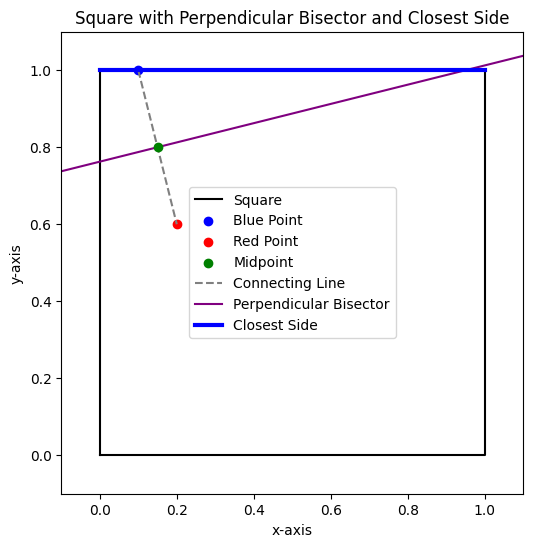

In [86]:
import numpy as np
import math
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import random
from utils import circle_intersection_area
from scipy.integrate import dblquad

def plot_square_with_perpendicular_bisector_and_check_shapely(pointA= None,pointB= None):
    # Define the square vertices
    square_x = [0, 1, 1, 0, 0]
    square_y = [0, 0, 1, 1, 0]
    
    # Generate two random uniform points in the square
    if pointA and pointB:
        point_blue = np.array([pointA[0], pointA[1]])
        point_red = np.array([pointB[0], pointB[1]])
    else: 
        point_blue = np.random.uniform(0, 1, 2)
        point_red = np.random.uniform(0, 1, 2)
    
    # Calculate the mediator (midpoint) between the blue and red points
    midpoint = (point_blue + point_red) / 2
    
    # Calculate the slope of the line connecting the two points
    dx = point_red[0] - point_blue[0]
    dy = point_red[1] - point_blue[1]
    
    # Define the perpendicular bisector as a line
    if dx == 0:  # Vertical bisector
        bisector = LineString([(midpoint[0], -0.1), (midpoint[0], 1.1)])
    elif dy == 0:  # Horizontal bisector
        bisector = LineString([(-0.1, midpoint[1]), (1.1, midpoint[1])])
    else:
        slope_perpendicular = -dx / dy
        # Define the perpendicular bisector line across the square bounds
        bisector_points = [
            (x, midpoint[1] + slope_perpendicular * (x - midpoint[0])) for x in [-0.1, 1.1]
        ]
        bisector = LineString(bisector_points)
    
    # Determine the closest side to the blue point
    distances = [
        abs(point_blue[1] - 0),  # Bottom side (y=0)
        abs(1 - point_blue[0]),  # Right side (x=1)
        abs(1 - point_blue[1]),  # Top side (y=1)
        abs(point_blue[0] - 0),  # Left side (x=0)
    ]
    closest_side_idx = np.argmin(distances)
    
    # Define the coordinates for the sides of the square
    sides = [
        LineString([(0, 0), (1, 0)]),  # Bottom side
        LineString([(1, 0), (1, 1)]),  # Right side
        LineString([(0, 1), (1, 1)]),  # Top side
        LineString([(0, 0), (0, 1)]),  # Left side
    ]
    
    closest_side = sides[closest_side_idx]
    
    # Check if the perpendicular bisector intersects the closest side
    if not bisector.intersection(closest_side).is_empty:
        print("yes")
    else:
        print("no")
    
    # Plot the square
    plt.figure(figsize=(6, 6))
    plt.plot(square_x, square_y, color='black', label="Square")
    
    # Plot the points
    plt.scatter(*point_blue, color='blue', label="Blue Point")
    plt.scatter(*point_red, color='red', label="Red Point")
    
    # Plot the mediator point
    plt.scatter(*midpoint, color='green', label="Midpoint", zorder=5)
    
    # Draw a line connecting the blue and red points
    plt.plot([point_blue[0], point_red[0]], [point_blue[1], point_red[1]], color='gray', linestyle='--', label="Connecting Line")
    
    # Plot the perpendicular bisector
    bisector_coords = list(bisector.coords)
    plt.plot([p[0] for p in bisector_coords], [p[1] for p in bisector_coords], color='purple', linestyle='-', label="Perpendicular Bisector")
    
    # Highlight the closest side in blue
    x_side, y_side = zip(*list(closest_side.coords))
    plt.plot(x_side, y_side, color='blue', linewidth=3, label="Closest Side")
    
    # Configure plot
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title("Square with Perpendicular Bisector and Closest Side")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    
    # Display the plot
    plt.show()

# Call the function to plot and check
plot_square_with_perpendicular_bisector_and_check_shapely([0.1,1],[0.2,0.6])


In [ ]:
def compute_probability(n):

    proba = 0

    for i in range(n):
        # Generate two random uniform points in the square
        point_blue = np.random.uniform(0, 1, 2)
        point_red = np.random.uniform(0, 1, 2)
        
        # Calculate the mediator (midpoint) between the blue and red points
        midpoint = (point_blue + point_red) / 2
        
        # Calculate the slope of the line connecting the two points
        dx = point_red[0] - point_blue[0]
        dy = point_red[1] - point_blue[1]
        
        # Define the perpendicular bisector as a line
        if dx == 0:  # Vertical bisector
            bisector = LineString([(midpoint[0], -0.1), (midpoint[0], 1.1)])
        elif dy == 0:  # Horizontal bisector
            bisector = LineString([(-0.1, midpoint[1]), (1.1, midpoint[1])])
        else:
            slope_perpendicular = -dx / dy
            # Define the perpendicular bisector line across the square bounds
            bisector_points = [
                (x, midpoint[1] + slope_perpendicular * (x - midpoint[0])) for x in [-0.1, 1.1]
            ]
            bisector = LineString(bisector_points)
        
        # Determine the closest side to the blue point
        distances = [
            abs(point_blue[1] - 0),  # Bottom side (y=0)
            abs(1 - point_blue[0]),  # Right side (x=1)
            abs(1 - point_blue[1]),  # Top side (y=1)
            abs(point_blue[0] - 0),  # Left side (x=0)
        ]
        closest_side_idx = np.argmin(distances)
        
        # Define the coordinates for the sides of the square
        sides = [
            LineString([(0, 0), (1, 0)]),  # Bottom side
            LineString([(1, 0), (1, 1)]),  # Right side
            LineString([(0, 1), (1, 1)]),  # Top side
            LineString([(0, 0), (0, 1)]),  # Left side
        ]
        
        closest_side = sides[closest_side_idx]
        
        # Check if the perpendicular bisector intersects the closest side
        if not bisector.intersection(closest_side).is_empty:
            proba += 1
        else:
            continue

    return proba/n

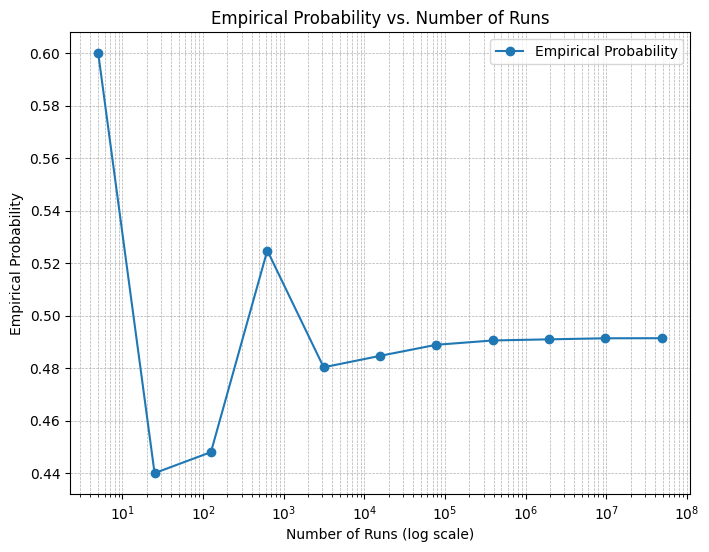

In [98]:
proba_different_run = []
runs = [5**j for j in range(1, 12)] 

for n in runs:
    proba_different_run.append(compute_probability(n))

# Plot the empirical probabilities
plt.figure(figsize=(8, 6))
plt.plot(runs, proba_different_run, marker='o', linestyle='-', label="Empirical Probability")
plt.xscale('log')
plt.title("Empirical Probability vs. Number of Runs")
plt.xlabel("Number of Runs (log scale)")
plt.ylabel("Empirical Probability")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

In [97]:
5**12

244140625

In [99]:
proba_different_run

[0.6,
 0.44,
 0.448,
 0.5248,
 0.48032,
 0.484672,
 0.488896,
 0.49053184,
 0.490965504,
 0.4913695744,
 0.4913916928]

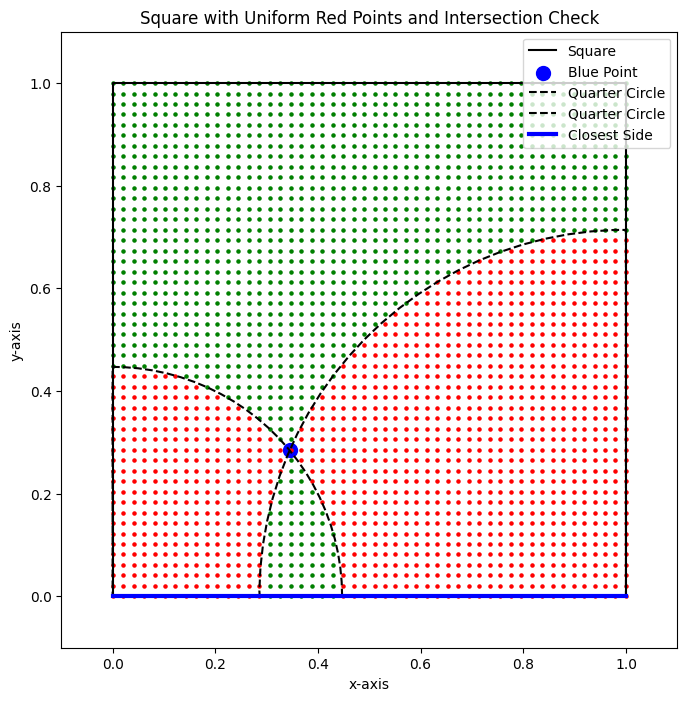

yes


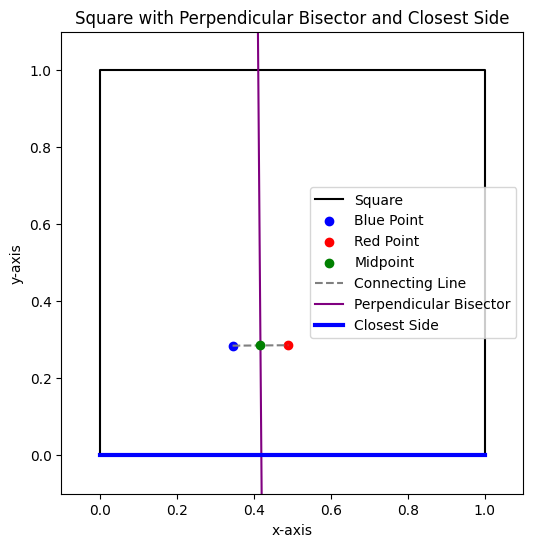

no


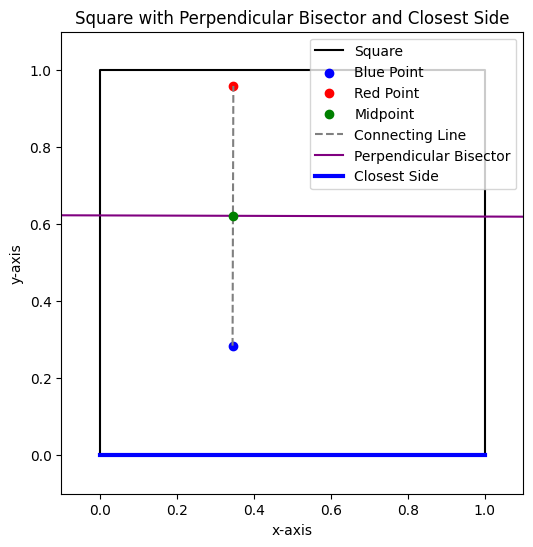

In [103]:
memor1 = []
memor2 = {0:[],1:[]}
def plot_square_with_uniform_red_points():
    # Define the square vertices
    square_x = [0, 1, 1, 0, 0]
    square_y = [0, 0, 1, 1, 0]
    
    # Generate a random blue point in the square
    point_blue = np.random.uniform(0, 1, 2)
    memor1.append(point_blue)
    
    # Create a grid of red points uniformly spaced in the square
    grid_size = 50  # Define the resolution of the grid
    x_grid, y_grid = np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size)
    red_points = np.array([(x, y) for x in x_grid for y in y_grid])
    
    # Plot the square
    plt.figure(figsize=(8, 8))
    plt.plot(square_x, square_y, color='black', label="Square")
    plt.scatter(*point_blue, color='blue', label="Blue Point", s=100)
    
    # Determine the closest side to the blue point
    distances = [
        abs(point_blue[1] - 0),  # Bottom side (y=0)
        abs(1 - point_blue[0]),  # Right side (x=1)
        abs(1 - point_blue[1]),  # Top side (y=1)
        abs(point_blue[0] - 0),  # Left side (x=0)
    ]
    closest_side_idx = np.argmin(distances)
    
    # Define the coordinates for the sides of the square
    sides = [
        LineString([(0, 0), (1, 0)]),  # Bottom side
        LineString([(1, 0), (1, 1)]),  # Right side
        LineString([(0, 1), (1, 1)]),  # Top side
        LineString([(0, 0), (0, 1)]),  # Left side
    ]
    closest_side = sides[closest_side_idx]
    closest_side_coords = list(closest_side.coords)

    # Add quarter circles at the edges of the closest side
    for edge in closest_side_coords:
        radius = np.linalg.norm(np.array(edge) - point_blue)
        theta = np.linspace(0, 2*np.pi, 100)  # Quarter circle
        if edge == closest_side_coords[0]:  # Adjust orientation for the first edge
            x = edge[0] + radius * np.cos(theta)
            y = edge[1] + radius * np.sin(theta)
        else:  # Adjust orientation for the second edge
            x = edge[0] - radius * np.sin(theta)
            y = edge[1] - radius * np.cos(theta)
        
        # Ensure the quarter circle is inside the square
        x = np.clip(x, 0, 1)
        y = np.clip(y, 0, 1)
        plt.plot(x, y, color='black', linestyle='--', label="Quarter Circle")
    
    # Plot the closest side in blue
    x_side, y_side = zip(*list(closest_side.coords))
    plt.plot(x_side, y_side, color='blue', linewidth=3, label="Closest Side")
    
    # Process each red point
    for point_red in red_points:
        # Calculate the mediator (midpoint) between the blue and red points
        midpoint = (point_blue + point_red) / 2
        
        # Calculate the slope of the line connecting the two points
        dx = point_red[0] - point_blue[0]
        dy = point_red[1] - point_blue[1]
        
        # Define the perpendicular bisector as a line
        if dx == 0:  # Vertical bisector
            bisector = LineString([(midpoint[0], -0.1), (midpoint[0], 1.1)])
        elif dy == 0:  # Horizontal bisector
            bisector = LineString([(-0.1, midpoint[1]), (1.1, midpoint[1])])
        else:
            slope_perpendicular = -dx / dy
            bisector_points = [
                (x, midpoint[1] + slope_perpendicular * (x - midpoint[0])) for x in [-0.1, 1.1]
            ]
            bisector = LineString(bisector_points)
        
        # Check if the perpendicular bisector intersects the closest side
        if not bisector.intersection(closest_side).is_empty:
            plt.scatter(point_red[0], point_red[1], color='red', s=5)  # Plot as red if intersecting
            memor2[0].append(point_red)
        else:
            plt.scatter(point_red[0], point_red[1], color='green', s=5)  # Plot as green otherwise
            memor2[1].append(point_red)
    
    # Configure and show plot
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("Square with Uniform Red Points and Intersection Check")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.legend()
    plt.show()

# Call the function
plot_square_with_uniform_red_points()
point_blue = memor1[0]
point_red = memor2[0][random.randint(0,len(memor2[0]))]
point_green = memor2[1][random.randint(0,len(memor2[1]))]

plot_square_with_perpendicular_bisector_and_check_shapely(list(point_blue),list(point_red))
plot_square_with_perpendicular_bisector_and_check_shapely(list(point_blue),list(point_green))

del memor2
del memor1

In [105]:
def integrand(y, x):
    r1 = math.sqrt(x**2 + y**2)
    r2 = math.sqrt((x - 1)**2 + y**2)
    d = 1  # Distance between the two circle centers
    quarter_circle_1 = (1 / 4) * math.pi * (x**2 + y**2)
    quarter_circle_2 = (1 / 4) * math.pi * ((x - 1)**2 + y**2)
    return  quarter_circle_1 + quarter_circle_2 - circle_intersection_area(r1, r2, d)

# Integration bounds
x_min = 0
x_max = 0.5

result, _ = dblquad(integrand, x_min, x_max, lambda x: 0, lambda x: x)
print(f"The result of the integral is: {result*8:.11f}")

The result of the integral is: 0.49140757884
